<a href="https://colab.research.google.com/github/Valerie-Perea/data_science_projects_vp/blob/main/VP_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Housing Prices

## Problem Definition


We want to understand what predictors have the most effect on housing prices. Our target vaiable is the thing we want to predict which is SalePrice. This is a continuous numerical value so the problem is a regression problem.Since we have a labeled dataset, the problem is superviced.

## Data Collection/Sources


In [797]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [798]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
housing = pd.read_csv(url)

## Data Cleaning


In [799]:
housing.shape

(2637, 81)

In [800]:
type(housing.shape)

tuple

In [801]:
rows, columns = housing.shape
{
  "Rows": rows,
  "Columns" : columns
}

{'Rows': 2637, 'Columns': 81}

### Data types and nulls

In [802]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [803]:
# What data can I extract to work with?
type(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

NoneType

NoneType data means I can't do anything easily with this data

### Some Basic Stats

In [804]:
housing.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.637000e+03,2637.000000,2188.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2614.000000,2636.000000,...,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,7.141301e+08,57.349261,69.166819,10044.694729,6.097459,5.569966,1971.288586,1984.202882,101.887911,438.441199,...,94.305271,46.984452,22.813424,2.368601,15.775123,2.130072,42.014031,6.243838,2007.795601,179986.230186
std,1.887527e+08,42.499091,23.356779,6742.549521,1.411522,1.118262,30.306986,20.913077,179.578232,449.602326,...,126.927272,66.564333,61.177638,23.160600,55.783751,35.140140,393.158781,2.722093,1.306403,78309.251522
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7436.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354530e+08,50.000000,68.000000,9450.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071870e+08,70.000000,80.000000,11526.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,732.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,1.007100e+09,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,584.000000,407.000000,576.000000,800.000000,12500.000000,12.000000,2010.000000,745000.000000


In [805]:
housing.describe().columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [806]:
len(housing.describe().columns)

38

In [807]:
len(housing.describe( include = "all" ).columns)

81

In [808]:
(
  housing
  .describe( include = "all" )
  .transpose()
  .astype({"count": int})
)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PID,2637,NaN,NaN,NaN,714130147.70383,188752674.750322,526301100.0,528477010.0,535453040.0,907187010.0,1007100110.0
MS SubClass,2637,NaN,NaN,NaN,57.349261,42.499091,20.0,20.0,50.0,70.0,190.0
MS Zoning,2637,7,RL,2043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,2188,NaN,NaN,NaN,69.166819,23.356779,21.0,58.0,68.0,80.0,313.0
Lot Area,2637,NaN,NaN,NaN,10044.694729,6742.549521,1300.0,7436.0,9450.0,11526.0,164660.0
...,...,...,...,...,...,...,...,...,...,...,...
Mo Sold,2637,NaN,NaN,NaN,6.243838,2.722093,1.0,4.0,6.0,8.0,12.0
Yr Sold,2637,NaN,NaN,NaN,2007.795601,1.306403,2006.0,2007.0,2008.0,2009.0,2010.0
Sale Type,2637,10,WD,2286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sale Condition,2637,6,Normal,2166,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nulls

In [809]:
housing.isnull()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2633,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2634,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2635,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [810]:
housing.isnull().sum()

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


### Calculate proportion of nulls

In [811]:
nulls = housing.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / housing.shape[0] * 100 ).round(1)

,0
Pool QC,99.6
Misc Feature,96.4
Alley,93.2
Fence,80.0
Mas Vnr Type,60.9
Fireplace Qu,48.7
Lot Frontage,17.0
Garage Cond,5.6
Garage Yr Blt,5.6
Garage Finish,5.6


### Get rid of all columns with 20% or more of nulls


In [812]:
missing_percentage = housing.isnull().mean() * 100

# Drop columns with 20% or more missing values
housing_cleaned = housing.drop(columns=missing_percentage[missing_percentage >= 20].index)

# Display the cleaned DataFrame
print("DataFrame after dropping columns with 20% or more missing values:")
print(housing_cleaned)

DataFrame after dropping columns with 20% or more missing values:
            PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0     905101070           20        RL          62.0     14299   Pave   
1     905101330           90        RL          72.0     10791   Pave   
2     903454090           50        RM          50.0      9000   Pave   
3     533244030           60        FV          68.0      7379   Pave   
4     909252020           70        RL          60.0      7200   Pave   
...         ...          ...       ...           ...       ...    ...   
2632  903231070           50        RM          52.0      6240   Pave   
2633  906201021           80        RL          74.0     10778   Pave   
2634  533253070          120        RL          61.0      3782   Pave   
2635  527376100           20        RL          78.0     10140   Pave   
2636  528292060           60        RL          41.0     12460   Pave   

     Lot Shape Land Contour Utilities Lot Config  ... Enc

In [813]:
# Check if columns were dropped
if "Pool QC" not in housing_cleaned.columns:
    print("Column 'Pool QC' has been dropped.")
else:
    print("Column 'Pool QC' is still present.")

Column 'Pool QC' has been dropped.


In [814]:
housing_cleaned.dtypes.sort_values()

,0
PID,int64
Low Qual Fin SF,int64
Gr Liv Area,int64
Full Bath,int64
Half Bath,int64
...,...
Bldg Type,object
Condition 2,object
Condition 1,object
BsmtFin Type 2,object


In [815]:
housing_cleaned['Lot Frontage'].value_counts()

,count
Lot Frontage,
60.0,247
80.0,124
70.0,123
50.0,104
75.0,95
...,...
150.0,1
140.0,1
200.0,1


In [816]:
housing_cleaned['Lot Frontage'].describe()

,Lot Frontage
count,2188.000000
mean,69.166819
std,23.356779
min,21.000000
25%,58.000000
50%,68.000000
75%,80.000000
max,313.000000


In [817]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
housing_cleaned['Lot Frontage'] = imputer.fit_transform(housing_cleaned[['Lot Frontage']])

In [818]:
housing_cleaned['Lot Frontage'].isnull().sum()

np.int64(0)

In [819]:
null_columns = housing_cleaned.columns[housing_cleaned.isnull().all()]
df_null_columns = housing_cleaned[null_columns]
print(df_null_columns)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2637 rows x 0 columns]


In [820]:
housing_cleaned['Kitchen Qual'].value_counts()

,count
Kitchen Qual,
TA,1342
Gd,1052
Ex,184
Fa,59


In [821]:
# Replace the descriptors for Kitchen Qual with values
housing_cleaned['Kitchen Qual'] = housing_cleaned['Kitchen Qual'].replace({'Ex': 4, 'TA': 1, 'Gd': 3, 'Fa': 2})

<ipython-input-821-59a5e7af676c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_cleaned['Kitchen Qual'] = housing_cleaned['Kitchen Qual'].replace({'Ex': 4, 'TA': 1, 'Gd': 3, 'Fa': 2})


In [822]:
housing_cleaned['Kitchen Qual'].value_counts()

,count
Kitchen Qual,
1,1342
3,1052
4,184
2,59


In [823]:
housing_cleaned['Year Remod/Add'].describe()

,Year Remod/Add
count,2637.000000
mean,1984.202882
std,20.913077
min,1950.000000
25%,1965.000000
50%,1993.000000
75%,2004.000000
max,2010.000000


In [824]:
housing_cleaned['Year Built'].describe()

,Year Built
count,2637.000000
mean,1971.288586
std,30.306986
min,1872.000000
25%,1954.000000
50%,1973.000000
75%,2001.000000
max,2010.000000


In [825]:
housing_cleaned.describe().columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [826]:
housing_cleaned['Garage Yr Blt'].describe()

,Garage Yr Blt
count,2490.000000
mean,1978.185944
std,25.452647
min,1895.000000
25%,1961.000000
50%,1979.000000
75%,2002.000000
max,2207.000000


In [827]:
housing_cleaned.drop(columns=['Garage Yr Blt'], inplace=True)

In [828]:
housing_cleaned.describe().columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [829]:
housing_cleaned['Misc Val'].value_counts()

,count
Misc Val,
0,2543
400,17
500,13
450,8
600,7
700,7
2000,6
1200,3
1500,3


In [830]:
housing_cleaned.drop(columns=['Misc Val'], inplace=True)

In [831]:
housing_cleaned['MS SubClass'].value_counts()

,count
MS SubClass,
20,968
60,531
50,253
120,173
30,126
160,117
70,115
80,105
90,95


MS subclass has data about stories, split level, attic. Can get rid of duplicate data

In [832]:
housing_cleaned['Mo Sold'].value_counts()

,count
Mo Sold,
6,452
7,406
5,357
4,240
3,213
8,205
10,160
9,151
11,130


In [833]:
housing_cleaned['Yr Sold'].value_counts()

,count
Yr Sold,
2007,626
2009,583
2008,578
2006,549
2010,301


In [834]:
housing_cleaned.describe().columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [835]:
housing_cleaned.drop(columns=['BsmtFin SF 1'], inplace=True)

In [836]:
housing_cleaned.drop(columns=['BsmtFin SF 2'], inplace=True)

In [837]:
housing_cleaned.drop(columns=['Bsmt Unf SF'], inplace=True)

In [838]:
housing_cleaned.drop(columns=['Bsmt Full Bath'], inplace=True)

In [839]:
housing_cleaned.drop(columns=['Bsmt Half Bath'], inplace=True)

In [840]:
housing_cleaned.drop(columns=['Bedroom AbvGr'], inplace=True)

In [841]:
housing_cleaned.drop(columns=['TotRms AbvGrd'], inplace=True)

In [842]:
housing_cleaned['Overall Qual'].value_counts()

,count
Overall Qual,
5,746
6,654
7,540
8,317
4,204
9,99
3,36
10,27
2,10


In [843]:
housing_cleaned['Overall Cond'].value_counts()

,count
Overall Cond,
5,1473
6,488
7,356
8,131
4,89
3,47
9,37
2,9
1,7


In [844]:
housing_cleaned.drop(columns=['Overall Qual'], inplace=True)

In [845]:
housing_cleaned.drop(columns=['PID'], inplace=True)

In [846]:
housing_cleaned.drop(columns=['Low Qual Fin SF'], inplace=True)

In [847]:
housing_cleaned.drop(columns=['Kitchen AbvGr'], inplace=True)

In [848]:
housing_cleaned.drop(columns=['Yr Sold'], inplace=True)

In [849]:
housing_cleaned.shape

(2637, 61)

In [850]:
housing_cleaned.describe().columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Kitchen Qual',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'SalePrice'],
      dtype='object')

In [851]:
# Pull out object data types
housing_categorical = housing_cleaned.select_dtypes(include = 'object')
housing_categorical.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Central Air,Electrical,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,...,Y,SBrkr,Typ,Detchd,Unf,TA,TA,N,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,Y,SBrkr,Typ,CarPort,Unf,TA,TA,Y,WD,Normal
2,RM,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,Y,SBrkr,Typ,Detchd,Unf,TA,TA,P,WD,Normal
3,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Y,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,...,Y,SBrkr,Typ,Detchd,RFn,TA,TA,Y,WD,Normal


In [852]:
# One hot encode these categories
housing_encoded = pd.get_dummies(housing_categorical)
housing_encoded.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [853]:
housing_encoded.shape

(2637, 238)

In [854]:
housing_categorical.shape

(2637, 36)

In [855]:
# Combine encoded dataframe to data frame with just numeric values
housing_numerical = housing_cleaned.select_dtypes(include = ['int64', 'float64'])
housing_numerical.shape

(2637, 25)

In [856]:
housing_combined = pd.concat([housing_numerical, housing_encoded], axis = 1)
housing_combined.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,2nd Flr SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,62.0,14299,3,1964,1964,0.0,1005.0,1005,0,...,False,False,False,True,False,False,False,False,True,False
1,90,72.0,10791,5,1967,1967,0.0,0.0,1296,0,...,False,False,False,True,False,False,False,False,True,False
2,50,50.0,9000,6,1937,1950,0.0,780.0,780,595,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,7379,5,2000,2000,0.0,975.0,975,873,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,7200,9,1936,2007,0.0,560.0,575,560,...,False,False,False,True,False,False,False,False,True,False


In [857]:
housing_combined.shape

(2637, 263)

In [858]:
housing_combined.isnull().sum()

,0
MS SubClass,0
Lot Frontage,0
Lot Area,0
Overall Cond,0
Year Built,0
...,...
Sale Condition_AdjLand,0
Sale Condition_Alloca,0
Sale Condition_Family,0
Sale Condition_Normal,0


In [859]:
housing_cleaned['Lot Frontage'].isnull().sum()

np.int64(0)

In [860]:
housing_combined.dtypes.value_counts()

,count
bool,238
int64,20
float64,5


In [861]:
housing_combined.isnull().sum()

,0
MS SubClass,0
Lot Frontage,0
Lot Area,0
Overall Cond,0
Year Built,0
...,...
Sale Condition_AdjLand,0
Sale Condition_Alloca,0
Sale Condition_Family,0
Sale Condition_Normal,0


In [862]:
nulls = housing_combined.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / housing_combined.shape[0] * 100 ).round(1)

,0
Mas Vnr Area,0.9
Total Bsmt SF,0.0
Garage Cars,0.0
Garage Area,0.0


In [863]:
housing_combined['Lot Frontage'].value_counts()

,count
Lot Frontage,
69.166819,449
60.000000,247
80.000000,124
70.000000,123
50.000000,104
...,...
150.000000,1
140.000000,1
200.000000,1


In [864]:
housing_combined['Lot Frontage'].fillna(housing_combined['Lot Frontage'].mean(), inplace = True)

<ipython-input-864-e90b2bee0762>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_combined['Lot Frontage'].fillna(housing_combined['Lot Frontage'].mean(), inplace = True)


In [865]:
nulls = housing_combined.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / housing_combined.shape[0] * 100 ).round(1)

,0
Mas Vnr Area,0.9
Total Bsmt SF,0.0
Garage Cars,0.0
Garage Area,0.0


In [866]:
housing_combined['Mas Vnr Area'].value_counts()

,count
Mas Vnr Area,
0.0,1580
176.0,13
216.0,12
200.0,12
120.0,12
...,...
576.0,1
464.0,1
438.0,1


In [867]:
housing_combined['Mas Vnr Area'].isnull().sum()

np.int64(23)

In [868]:
housing_combined['Mas Vnr Area'] = housing_combined['Mas Vnr Area'].fillna(housing_combined['Mas Vnr Area'].mean())

# Verify that NaN values were filled
print(housing_combined['Mas Vnr Area'].isnull().sum())

0


In [869]:
nulls = housing_combined.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / housing_combined.shape[0] * 100 ).round(1)

,0
Total Bsmt SF,0.0
Garage Cars,0.0
Garage Area,0.0


In [870]:
housing_combined['Total Bsmt SF'].value_counts()

,count
Total Bsmt SF,
0.0,72
864.0,69
768.0,24
1040.0,24
912.0,23
...,...
629.0,1
2461.0,1
1475.0,1


In [871]:
housing_combined['Total Bsmt SF'].isnull().sum()

np.int64(1)

In [872]:
housing_combined['Total Bsmt SF'] = housing_combined['Total Bsmt SF'].fillna(housing_combined['Total Bsmt SF'].mean())

# Verify that NaN values were filled
print(housing_combined['Total Bsmt SF'].isnull().sum())

0


In [873]:
housing_combined['Garage Cars'].value_counts()

,count
Garage Cars,
2.0,1449
1.0,696
3.0,331
0.0,145
4.0,14
5.0,1


In [874]:
housing_combined['Garage Cars'].isnull().sum()

np.int64(1)

In [875]:
housing_combined['Garage Cars'] = housing_combined['Garage Cars'].fillna(housing_combined['Garage Cars'].mean())

# Verify that NaN values were filled
print(housing_combined['Garage Cars'].isnull().sum())

0


In [876]:
housing_combined['Garage Area'].value_counts()

,count
Garage Area,
0.0,145
576.0,91
440.0,89
484.0,71
240.0,59
...,...
815.0,1
465.0,1
217.0,1


In [877]:
housing_combined['Garage Area'].isnull().sum()

np.int64(1)

In [878]:
housing_combined['Garage Area'] = housing_combined['Garage Area'].fillna(housing_combined['Garage Area'].mean())

# Verify that NaN values were filled
print(housing_combined['Garage Area'].isnull().sum())

0


In [879]:
nulls = housing_combined.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / housing_combined.shape[0] * 100 ).round(1)

,0


In [880]:
housing_combined.describe().columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Kitchen Qual',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'SalePrice'],
      dtype='object')

In [881]:
housing_combined.shape

(2637, 263)

## Exploratory Data Analysis


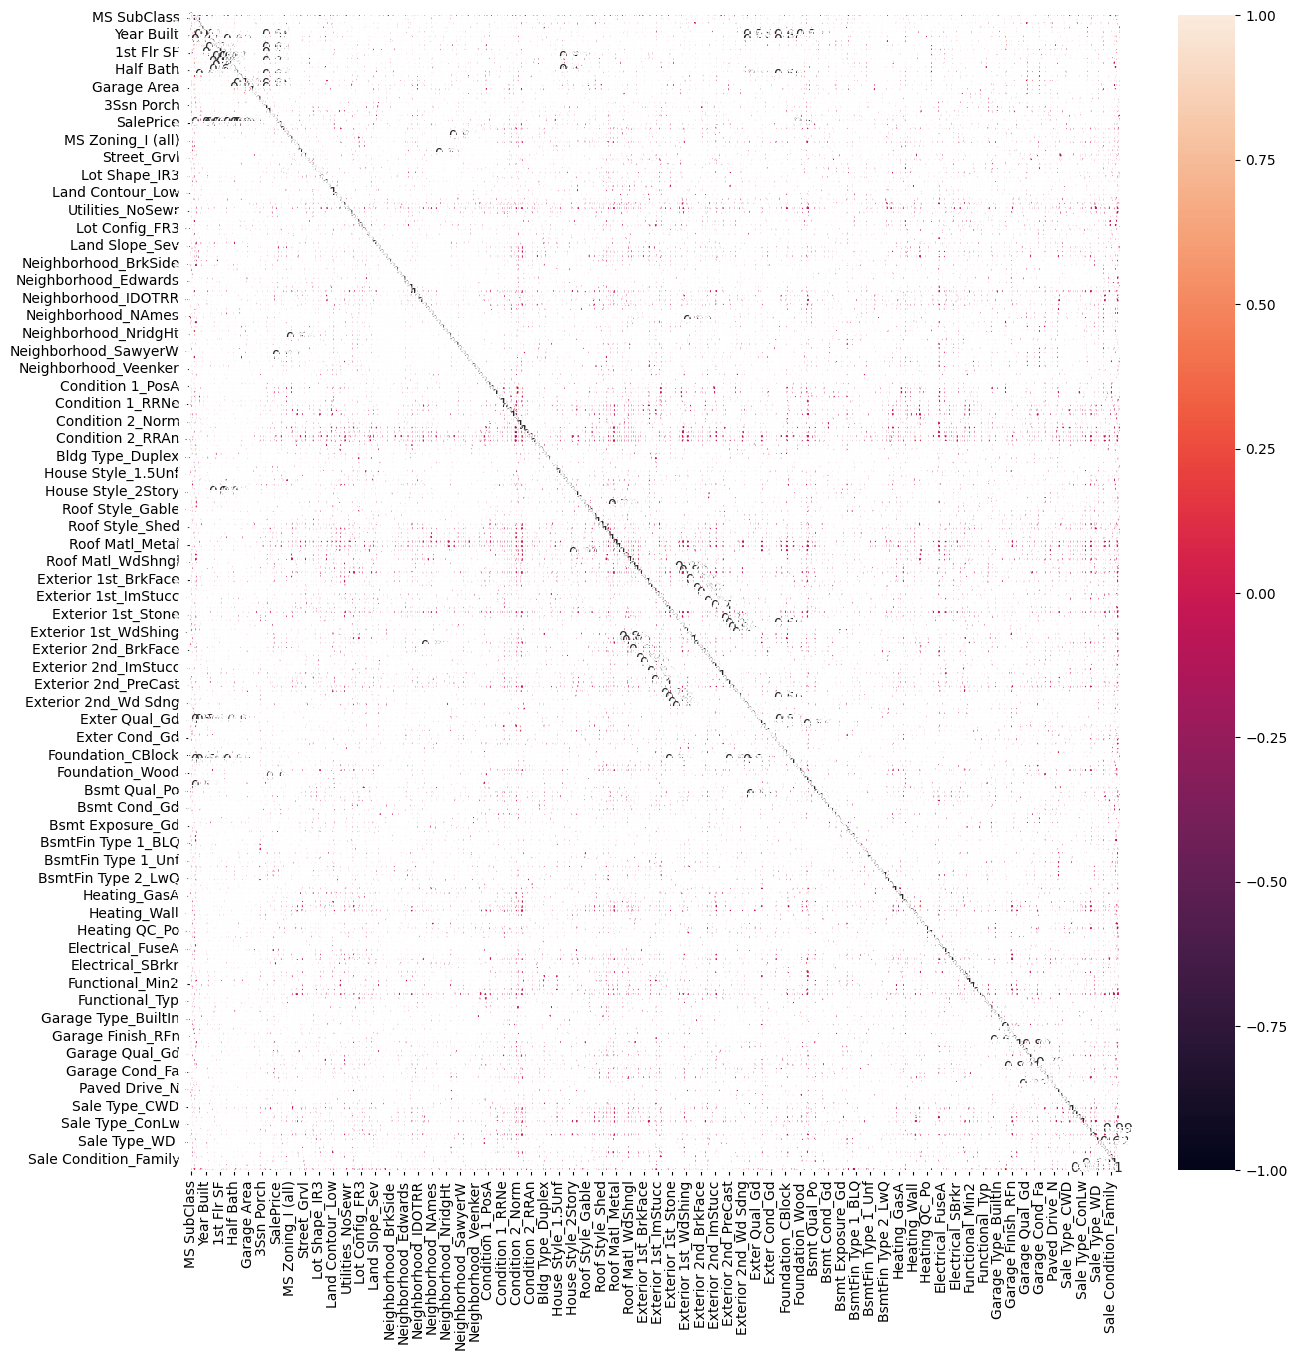

In [882]:
# Let's take a look at a correlation plot
plt.figure(figsize=(15,15))
correlation_matrix = housing_combined.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) ;

In [883]:
# List of most highly correlated
corr_series = correlation_matrix.abs().unstack()
lt_df = (
  corr_series[ ( 0.92 < corr_series ) & ( corr_series < 1 )]
    .sort_values( ascending=False)
    .drop_duplicates()
    .to_frame()
    .rename( columns={0:"A"} )
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs

Index(['Sale Condition_Partial', 'Exterior 1st_VinylSd',
       'Exterior 1st_MetalSd', 'Roof Style_Hip', 'Sale Type_New',
       'Exterior 2nd_VinylSd', 'Exterior 2nd_MetalSd', 'Roof Style_Gable'],
      dtype='object')

In [884]:
lower_triangle = np.tril(abs(correlation_matrix)+1.1, k=-1)-1.1
lower_triangle_df  = pd.DataFrame(lower_triangle, index=correlation_matrix.index, columns=correlation_matrix.columns)
lt_df = (
  lower_triangle_df
    .unstack()
    .to_frame()
    .rename( columns={0:"A"} )
    .query( "A > 0.92")
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs


Index(['Street_Grvl', 'Central Air_N', 'Exterior 1st_PreCast', 'Sale Type_New',
       'Exterior 1st_VinylSd', 'Exterior 1st_CemntBd', 'Exterior 1st_MetalSd',
       'Lot Shape_IR1', 'Land Slope_Gtl', 'Roof Style_Gable', 'Street_Pave',
       'Central Air_Y', 'Exterior 2nd_PreCast', 'Sale Condition_Partial',
       'Exterior 2nd_VinylSd', 'Exterior 2nd_CmentBd', 'Exterior 2nd_MetalSd',
       'Lot Shape_Reg', 'Land Slope_Mod', 'Roof Style_Hip'],
      dtype='object')

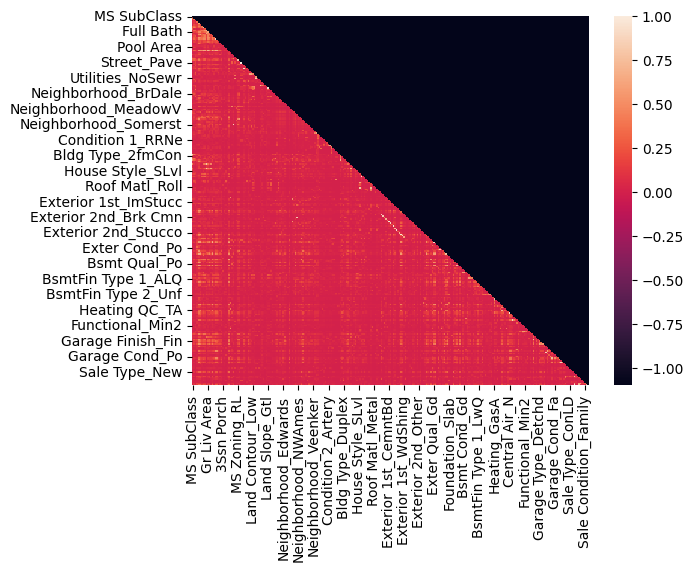

In [885]:
# plt.figure(figsize=(15,15))
sns.heatmap(data=lower_triangle_df, annot=False) ;

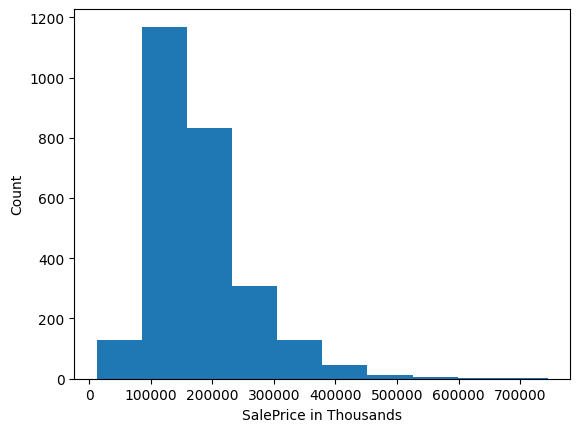

In [886]:
# Let's look at the distribution of salaries
plt.hist(housing_cleaned['SalePrice'])
plt.xlabel('SalePrice in Thousands')
plt.ylabel("Count")
plt.savefig('test.png')

## Processing


### Feature Selection

In [887]:
# Sort correlations w/ price
housing_numerical.corr()['SalePrice'].abs().sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
Gr Liv Area,0.705482
Garage Cars,0.647223
Kitchen Qual,0.637801
Garage Area,0.633900
Total Bsmt SF,0.628669
1st Flr SF,0.618247
Year Built,0.562777
Full Bath,0.542386
Year Remod/Add,0.539932


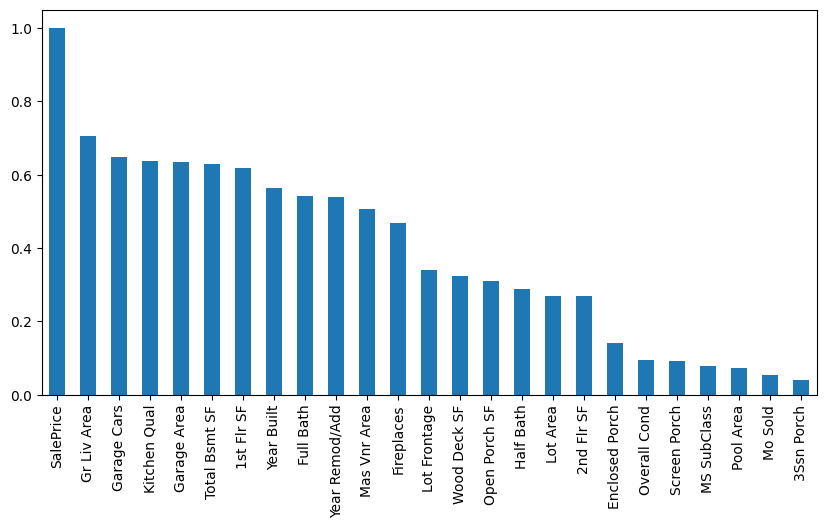

In [888]:
# Plot result
housing_numerical.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5)) ;

In [889]:
# Fit linear regression model w/ just continuous predictors highly correlated with response
corrs = housing_numerical.corr()['SalePrice'].abs().sort_values(ascending = False)
keep = corrs[(corrs>.2) & (corrs <1)]
keep

,SalePrice
Gr Liv Area,0.705482
Garage Cars,0.647223
Kitchen Qual,0.637801
Garage Area,0.633900
Total Bsmt SF,0.628669
1st Flr SF,0.618247
Year Built,0.562777
Full Bath,0.542386
Year Remod/Add,0.539932
Mas Vnr Area,0.506402


In [890]:
# split into Target and Features
X = housing_combined.drop('SalePrice', axis = 1)
y = housing_combined['SalePrice']

In [891]:
X_corr = X[keep.index]
X_corr.head()

,Gr Liv Area,Garage Cars,Kitchen Qual,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,Lot Frontage,Wood Deck SF,Open Porch SF,Half Bath,Lot Area,2nd Flr SF
0,1005,2.0,1,440.0,1005.0,1005,1964,1,1964,0.0,0,62.0,0,0,0,14299,0
1,1296,2.0,1,516.0,0.0,1296,1967,2,1967,0.0,0,72.0,0,0,0,10791,0
2,1375,1.0,3,544.0,780.0,780,1937,1,1950,0.0,1,50.0,0,162,1,9000,595
3,1848,2.0,3,592.0,975.0,975,2000,2,2000,0.0,1,68.0,280,184,1,7379,873
4,1135,2.0,3,576.0,560.0,575,1936,1,2007,0.0,0,60.0,256,0,0,7200,560


In [892]:
# Combine correlated numerical predictors with all encoded categorical predictors
X = pd.concat([X_corr, housing_encoded], axis = 1)
X.head()

,Gr Liv Area,Garage Cars,Kitchen Qual,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1005,2.0,1,440.0,1005.0,1005,1964,1,1964,0.0,...,False,False,False,True,False,False,False,False,True,False
1,1296,2.0,1,516.0,0.0,1296,1967,2,1967,0.0,...,False,False,False,True,False,False,False,False,True,False
2,1375,1.0,3,544.0,780.0,780,1937,1,1950,0.0,...,False,False,False,True,False,False,False,False,True,False
3,1848,2.0,3,592.0,975.0,975,2000,2,2000,0.0,...,False,False,False,True,False,False,False,False,True,False
4,1135,2.0,3,576.0,560.0,575,1936,1,2007,0.0,...,False,False,False,True,False,False,False,False,True,False


In [893]:
X.shape

(2637, 255)

In [894]:
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSE: 29244.38
Number of Predictors: 255


In [895]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

### Anova

<Axes: >

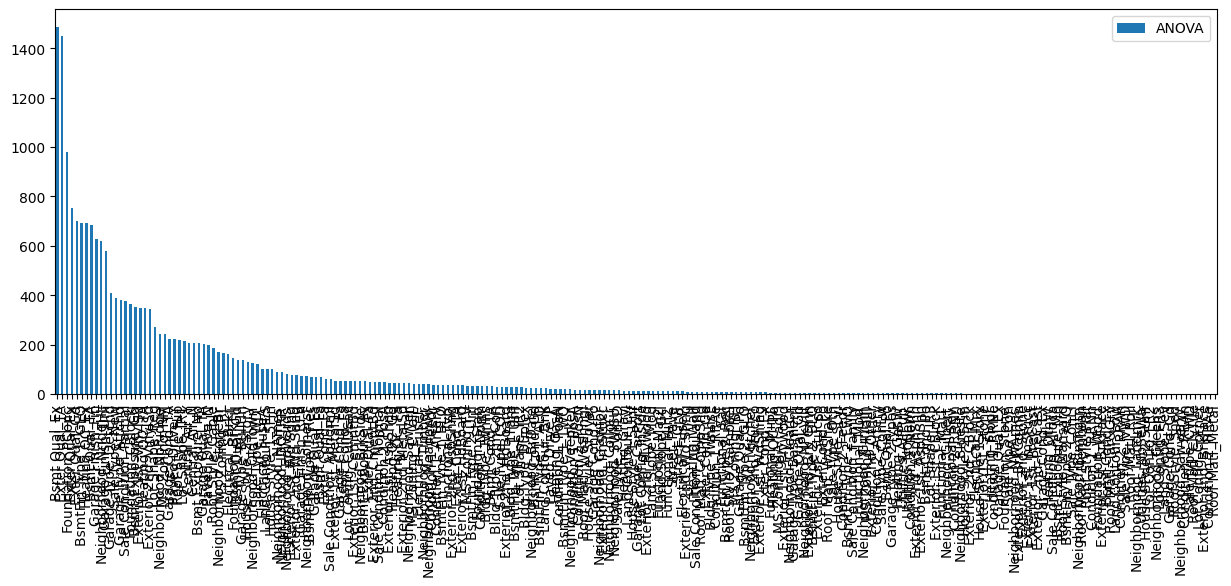

In [896]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fvalue_selector = SelectKBest(f_regression, k='all')  #select features best ANOVA F-Values
fvalue_selector.fit_transform(housing_encoded, y)

# Plot results
results = pd.DataFrame({'ANOVA': fvalue_selector.scores_}, index = housing_encoded.columns)
results.sort_values(by = 'ANOVA', ascending = False).plot(kind = 'bar', figsize = (15,5))

In [897]:
# Just keep the results with F-values greater than 20
anova = results.sort_values(by = 'ANOVA', ascending = False)
keep = anova['ANOVA'][anova['ANOVA'] > 20]
keep

,ANOVA
Bsmt Qual_Ex,1484.262926
Exter Qual_TA,1449.728439
Foundation_PConc,979.636599
Exter Qual_Ex,752.106986
Exter Qual_Gd,702.034448
...,...
Bsmt Cond_Gd,24.255145
BsmtFin Type 1_ALQ,23.505586
Land Contour_Bnk,22.922430
Paved Drive_P,21.082543


In [898]:
X_anova = X[keep.index]

In [899]:
X_anova

,Bsmt Qual_Ex,Exter Qual_TA,Foundation_PConc,Exter Qual_Ex,Exter Qual_Gd,BsmtFin Type 1_GLQ,Heating QC_Ex,Bsmt Qual_TA,Garage Finish_Fin,Neighborhood_NridgHt,...,Bldg Type_1Fam,BsmtFin Type 1_Unf,Lot Shape_IR2,Bldg Type_Duplex,Neighborhood_BrDale,Bsmt Cond_Gd,BsmtFin Type 1_ALQ,Land Contour_Bnk,Paved Drive_P,Heating_GasA
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,True,True,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,True,True
3,False,False,True,False,True,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,False,True,False,True,False,True,False,False,False,...,True,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,True,True,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True
2633,False,False,True,False,True,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2634,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2635,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True


In [900]:
X2 = pd.concat([X_anova, X_corr], axis = 1)
X2.head()

,Bsmt Qual_Ex,Exter Qual_TA,Foundation_PConc,Exter Qual_Ex,Exter Qual_Gd,BsmtFin Type 1_GLQ,Heating QC_Ex,Bsmt Qual_TA,Garage Finish_Fin,Neighborhood_NridgHt,...,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,Lot Frontage,Wood Deck SF,Open Porch SF,Half Bath,Lot Area,2nd Flr SF
0,False,True,False,False,False,False,False,True,False,False,...,1,1964,0.0,0,62.0,0,0,0,14299,0
1,False,True,False,False,False,False,False,False,False,False,...,2,1967,0.0,0,72.0,0,0,0,10791,0
2,False,True,True,False,False,False,False,True,False,False,...,1,1950,0.0,1,50.0,0,162,1,9000,595
3,False,False,True,False,True,True,True,False,False,False,...,2,2000,0.0,1,68.0,280,184,1,7379,873
4,False,False,True,False,True,False,True,False,False,False,...,1,2007,0.0,0,60.0,256,0,0,7200,560


In [901]:
( X_corr.shape, X_anova.shape, X.shape, X2.shape)

((2637, 17), (2637, 103), (2637, 255), (2637, 120))

In [902]:
# Perform CV
n = 500
rmse_results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse_results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {rmse_results.mean().round(2)}")
print(f"Number of Predictors: {len(X2.columns)}")

CV RMSE: 28761.11
Number of Predictors: 120


### Linear Regression

In [923]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [924]:
# split into Target and Features
X = housing_combined.drop('SalePrice', axis = 1)
y = housing_combined['SalePrice']

In [925]:
from sklearn.preprocessing import StandardScaler
# normalize the features
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.87899161, -0.33693347,  0.63108356, ..., -0.1302642 ,
         0.46631698, -0.30319213],
       [ 0.76841484,  0.13319626,  0.11070691, ..., -0.1302642 ,
         0.46631698, -0.30319213],
       [-0.17296027, -0.90108914, -0.15497   , ..., -0.1302642 ,
         0.46631698, -0.30319213],
       ...,
       [ 1.47444617, -0.38394644, -0.92900801, ..., -0.1302642 ,
         0.46631698, -0.30319213],
       [-0.87899161,  0.4152741 ,  0.01413758, ..., -0.1302642 ,
         0.46631698, -0.30319213],
       [ 0.0623835 , -1.3242059 ,  0.35828634, ..., -0.1302642 ,
         0.46631698, -0.30319213]])

In [926]:
X.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF',
       ...
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_Abnorml', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=262)

In [927]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [928]:
X.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,2nd Flr SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,62.0,14299,3,1964,1964,0.0,1005.0,1005,0,...,False,False,False,True,False,False,False,False,True,False
1,90,72.0,10791,5,1967,1967,0.0,0.0,1296,0,...,False,False,False,True,False,False,False,False,True,False
2,50,50.0,9000,6,1937,1950,0.0,780.0,780,595,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,7379,5,2000,2000,0.0,975.0,975,873,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,7200,9,1936,2007,0.0,560.0,575,560,...,False,False,False,True,False,False,False,False,True,False


In [929]:
X_scaled.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,2nd Flr SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,-0.878992,-0.336933,0.631084,-2.298616,-0.240538,-0.966224,-0.569973,-0.093543,-0.393454,-0.788019,...,-0.298696,-0.047755,-0.019477,0.391846,-0.265792,-0.061698,-0.089596,-0.130264,0.466317,-0.303192
1,0.768415,0.133196,0.110707,-0.509786,-0.141532,-0.822746,-0.569973,-2.433348,0.367281,-0.788019,...,-0.298696,-0.047755,-0.019477,0.391846,-0.265792,-0.061698,-0.089596,-0.130264,0.466317,-0.303192
2,-0.172960,-0.901089,-0.154970,0.384629,-1.131590,-1.635788,-0.569973,-0.617380,-0.981651,0.603270,...,-0.298696,-0.047755,-0.019477,0.391846,-0.265792,-0.061698,-0.089596,-0.130264,0.466317,-0.303192
3,0.062384,-0.054856,-0.395429,-0.509786,0.947533,0.755514,-0.569973,-0.163388,-0.471880,1.253317,...,-0.298696,-0.047755,-0.019477,0.391846,-0.265792,-0.061698,-0.089596,-0.130264,0.466317,-0.303192
4,0.297727,-0.430959,-0.421982,3.067873,-1.164592,1.090296,-0.569973,-1.129576,-1.517563,0.521429,...,-0.298696,-0.047755,-0.019477,0.391846,-0.265792,-0.061698,-0.089596,-0.130264,0.466317,-0.303192


In [930]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

In [931]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = my_fit_lr.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results


,Predictor,Linear
10,Gr Liv Area,14464.296871
9,2nd Flr SF,12811.807623
7,Total Bsmt SF,12064.537624
4,Year Built,9737.739629
8,1st Flr SF,9048.742754
...,...,...
238,Garage Cond_Ex,-4411.103749
227,Garage Type_BuiltIn,-7030.972907
116,Roof Matl_ClyTile,-11583.396234
229,Garage Type_Detchd,-12288.427196


In [932]:
model_results['Linear'] = my_fit_lr.coef_

In [933]:
model_results

,Predictor,Linear
10,Gr Liv Area,-4151.324650
9,2nd Flr SF,1447.285475
7,Total Bsmt SF,2548.439678
4,Year Built,7111.459542
8,1st Flr SF,9737.739629
...,...,...
238,Garage Cond_Ex,1616.536259
227,Garage Type_BuiltIn,1320.364212
116,Roof Matl_ClyTile,-111.496064
229,Garage Type_Detchd,1206.869570


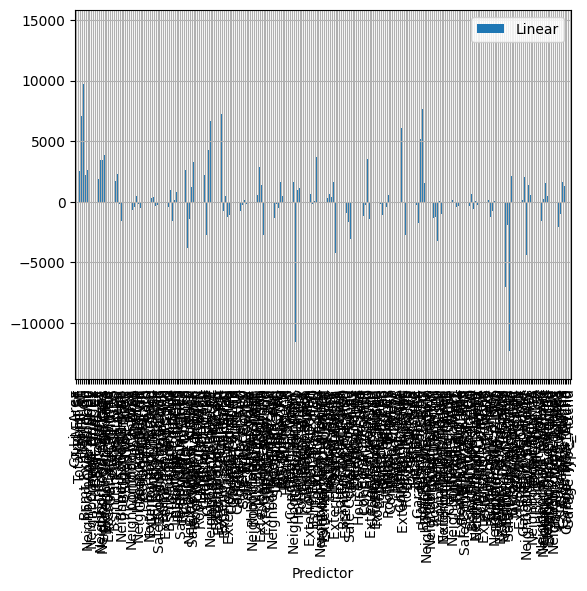

In [934]:
# We can even plot the coefficients if we want to!
model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
plt.grid()

In [935]:
# Calculate CV RMSE
results = cross_val_score(
    model,
    X_scaled,
    y,
    scoring='neg_root_mean_squared_error',
    cv = 10
    )
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 27181.8750883676


### This is showing that we have a RMSE of about $27,181.8

### Regularization - Ridge Regression


In [936]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

In [937]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;

In [938]:
# Calculate RMSE
y_pred = my_fit_rr.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 20764.77239423576


In [939]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_rr,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
      )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

           Alpha          RMSE
15  5.000000e+01  2.692150e+04
14  3.000000e+01  2.699231e+04
13  2.000000e+01  2.703769e+04
12  1.000000e+01  2.709454e+04
11  5.000000e+00  2.713020e+04
10  4.000000e+00  2.713826e+04
9   3.000000e+00  2.714675e+04
8   2.000000e+00  2.715585e+04
7   1.000000e+00  2.716619e+04
6   1.000000e-01  2.717959e+04
5   1.000000e-02  2.718163e+04
4   1.000000e-03  2.718185e+04
3   1.000000e-04  2.718187e+04
2   1.000000e-08  2.718192e+04
1   1.000000e-10  2.718849e+04
0   1.000000e-15  1.276911e+06


In [940]:
# Retrain the model w/ alpha = 50
my_fit_rr = Ridge(alpha = 50)
my_fit_rr.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_rr, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 26921.496220021258


In [941]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [942]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are your training features and target, respectively

# Train the model
my_fit_rr = Ridge(alpha=20, tol=.01, max_iter=10000)

# Get cross-validated predictions for the training data
y_pred = cross_val_predict(my_fit_rr, X_train, y_train, cv=10)

# Ensure that y_train and y_pred have the same length
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_pred: {len(y_pred)}")
# Calculate percentage errors (ensure the shapes match)
percentage_errors = (y_train.values - y_pred) / y_train.values  # Use .values if y_train is a pandas Series

# Square the percentage errors
squared_percentage_errors = percentage_errors ** 2

# Calculate the mean squared percentage error
mean_squared_percentage_error = np.mean(squared_percentage_errors)

# Take the square root to get RMSPE
rmspe = np.sqrt(mean_squared_percentage_error)

# Print the result (multiply by 100 to express as a percentage)
print(f"RMSPE: {rmspe * 100:.2f}%")

Length of y_train: 2109
Length of y_pred: 2109
RMSPE: 22.24%


In [943]:
model_results

,Predictor,Linear,Ridge
10,Gr Liv Area,-4151.324650,-2935.804904
9,2nd Flr SF,1447.285475,1575.361533
7,Total Bsmt SF,2548.439678,2503.045546
4,Year Built,7111.459542,6447.686248
8,1st Flr SF,9737.739629,7569.718288
...,...,...,...
238,Garage Cond_Ex,1616.536259,1434.376610
227,Garage Type_BuiltIn,1320.364212,919.262169
116,Roof Matl_ClyTile,-111.496064,-335.363716
229,Garage Type_Detchd,1206.869570,522.311086


### Regression - Lasso

In [944]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [945]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_lasso,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
  )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))
print((y_train - y_pred/ y_train)*100)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.324e+11, tolerance: 1.325e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.644e+11, tolerance: 1.461e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.617e+11, tolerance: 1.438e

           Alpha          RMSE
15  5.000000e+01  26931.289079
14  3.000000e+01  27012.470867
13  2.000000e+01  27074.398475
12  1.000000e+01  27113.752601
11  5.000000e+00  27131.306360
10  4.000000e+00  27133.514019
9   3.000000e+00  27135.600829
8   2.000000e+00  27140.762278
7   1.000000e+00  27146.802743
0   1.000000e-15  27151.531014
1   1.000000e-10  27151.531014
2   1.000000e-08  27151.531014
3   1.000000e-04  27151.531645
4   1.000000e-03  27151.537339
5   1.000000e-02  27151.594223
6   1.000000e-01  27151.974954
2019    1.509990e+07
762     1.779990e+07
1073    2.394990e+07
652     1.059992e+07
356     1.459990e+07
            ...     
1032    1.539987e+07
2121    1.149992e+07
1424    1.954990e+07
1725    1.129993e+07
2254    1.879988e+07
Name: SalePrice, Length: 2109, dtype: float64


In [946]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are your training features and target, respectively

# Train the model
my_fit_lasso = Lasso(alpha=20, tol=.01, max_iter=10000)

# Get cross-validated predictions for the training data
y_pred = cross_val_predict(my_fit_lasso, X_train, y_train, cv=10)

# Ensure that y_train and y_pred have the same length
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_pred: {len(y_pred)}")
# Calculate percentage errors (ensure the shapes match)
percentage_errors = (y_train.values - y_pred) / y_train.values  # Use .values if y_train is a pandas Series

# Square the percentage errors
squared_percentage_errors = percentage_errors ** 2

# Calculate the mean squared percentage error
mean_squared_percentage_error = np.mean(squared_percentage_errors)

# Take the square root to get RMSPE
rmspe = np.sqrt(mean_squared_percentage_error)

# Print the result (multiply by 100 to express as a percentage)
print(f"RMSPE: {rmspe * 100:.2f}%")

Length of y_train: 2109
Length of y_pred: 2109
RMSPE: 22.50%


In [947]:
results_df

,Alpha,RMSE
0,1.000000e-15,27151.531014
1,1.000000e-10,27151.531014
2,1.000000e-08,27151.531014
3,1.000000e-04,27151.531645
4,1.000000e-03,27151.537339
5,1.000000e-02,27151.594223
6,1.000000e-01,27151.974954
7,1.000000e+00,27146.802743
8,2.000000e+00,27140.762278
9,3.000000e+00,27135.600829


In [948]:
# Train the model
my_fit_lasso = Lasso(alpha = 20, tol = .01, max_iter=10000)
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 27075.04925963426


In [949]:
# Add Lasso results to the data frame we created before
model_results['Lasso'] = my_fit_lasso.coef_

In [950]:
model_results

,Predictor,Linear,Ridge,Lasso
10,Gr Liv Area,-4151.324650,-2935.804904,-3403.007250
9,2nd Flr SF,1447.285475,1575.361533,1494.805047
7,Total Bsmt SF,2548.439678,2503.045546,2536.497493
4,Year Built,7111.459542,6447.686248,6995.577787
8,1st Flr SF,9737.739629,7569.718288,9684.177338
...,...,...,...,...
238,Garage Cond_Ex,1616.536259,1434.376610,1578.393462
227,Garage Type_BuiltIn,1320.364212,919.262169,999.736752
116,Roof Matl_ClyTile,-111.496064,-335.363716,-176.985568
229,Garage Type_Detchd,1206.869570,522.311086,901.029544


## Data Visualization/Communication of Results


In [952]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Perform CV
n = 500
rmspe_results = np.zeros(n)  # To store RMSPE values

for idx in range(n):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate RMSPE for this fold
    percentage_error = np.abs((y_test - y_pred) / y_test)  # Percentage error for each sample
    rmspe_results[idx] = np.sqrt(np.mean(percentage_error ** 2))  # Root Mean Squared Percentage Error

# Print the mean RMSPE
print(f"CV RMSPE: {rmspe_results.mean().round(4)}")

# Print the number of predictors
print(f"Number of Predictors: {len(X2.columns)}")

CV RMSPE: 0.1999
Number of Predictors: 120


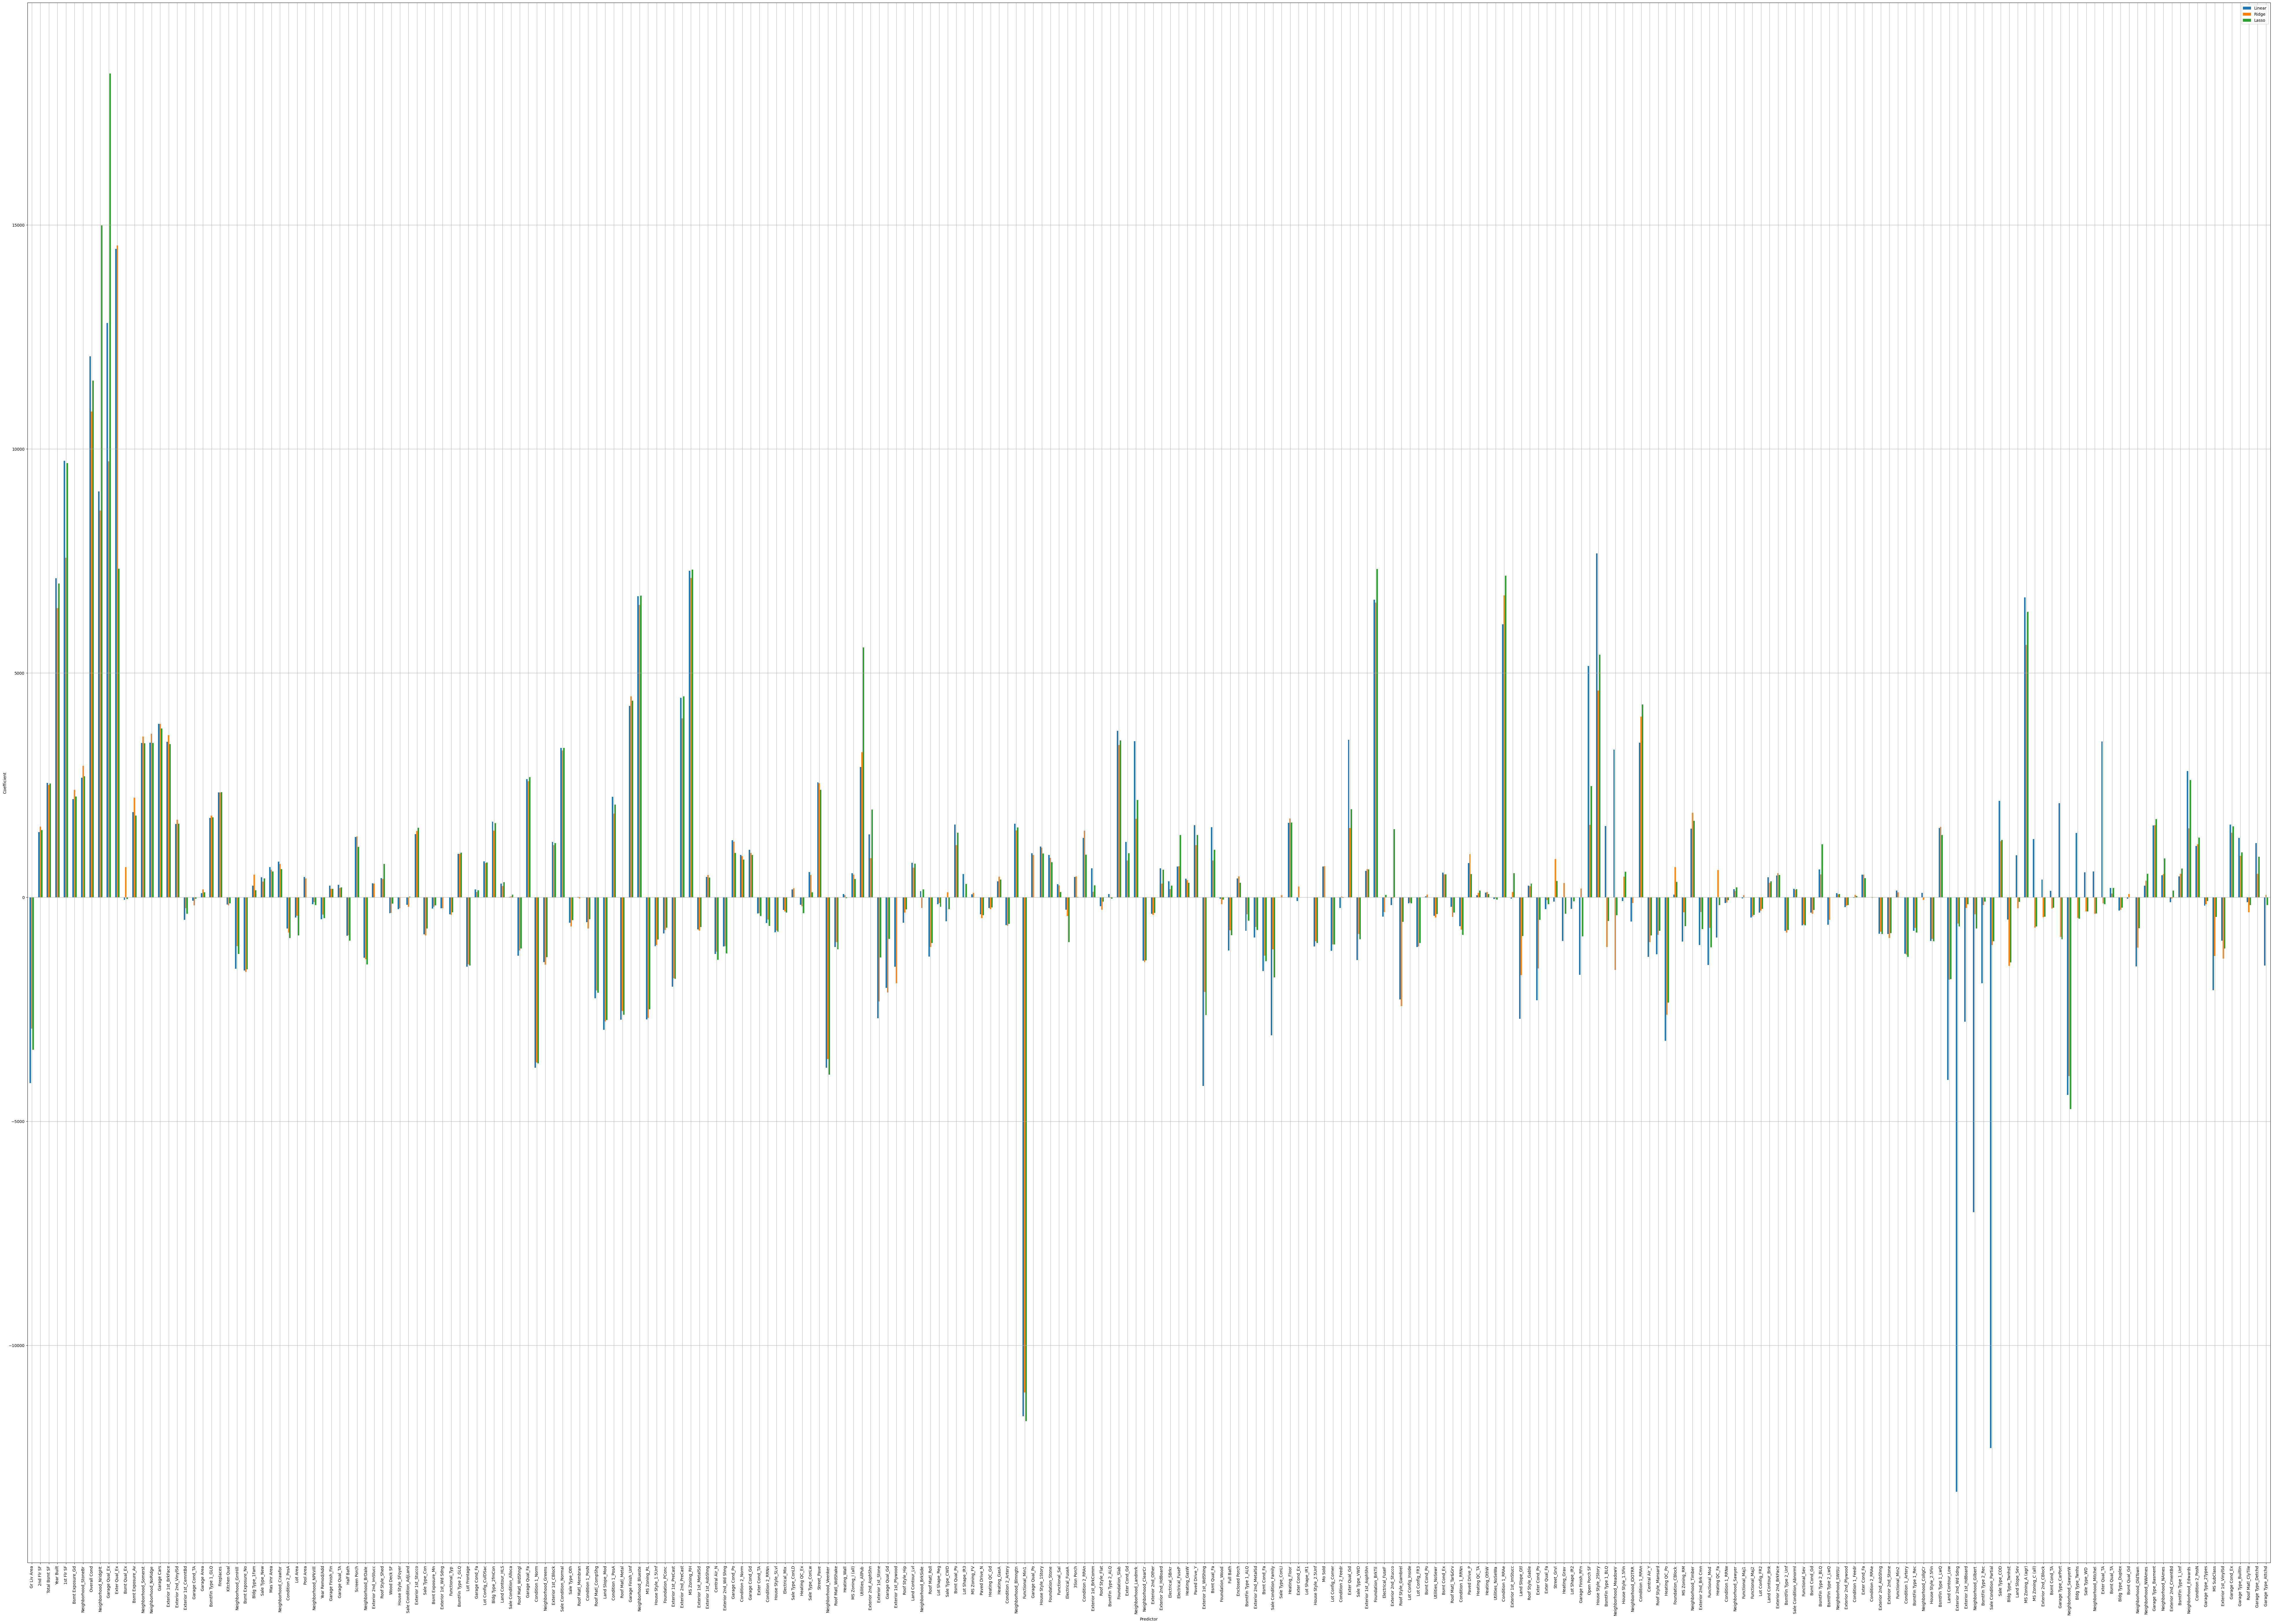

In [953]:
# Plot results
import matplotlib.pyplot as plt # Import the library containing 'plt'
fig, ax = plt.subplots(1,1, figsize = (100,70))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

After performing regularization our RMSPE went from
19.3% with linear regression to 22.44% with Ridge regression to
22.50% with Lasso regression. For all models Overall Condition, Neighborhood_NridgHt, Garage Quality and Exterior Quality, seem to be the most important predictors of Sale Price.